# Step 1 :- Import data & Library

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
customer_data = pd.read_csv(r"C:\Users\naveen kumar pandey\Desktop\DATA ANALYTICS\PYTHON\Complete Machine Learning Project\shoppingdata (1).csv")
customer_data

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Step 2 :-  Take specific Variable for Analysis

In [4]:
data = customer_data.iloc[:, 3:5].values
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Step 3 :-  Dendogram 

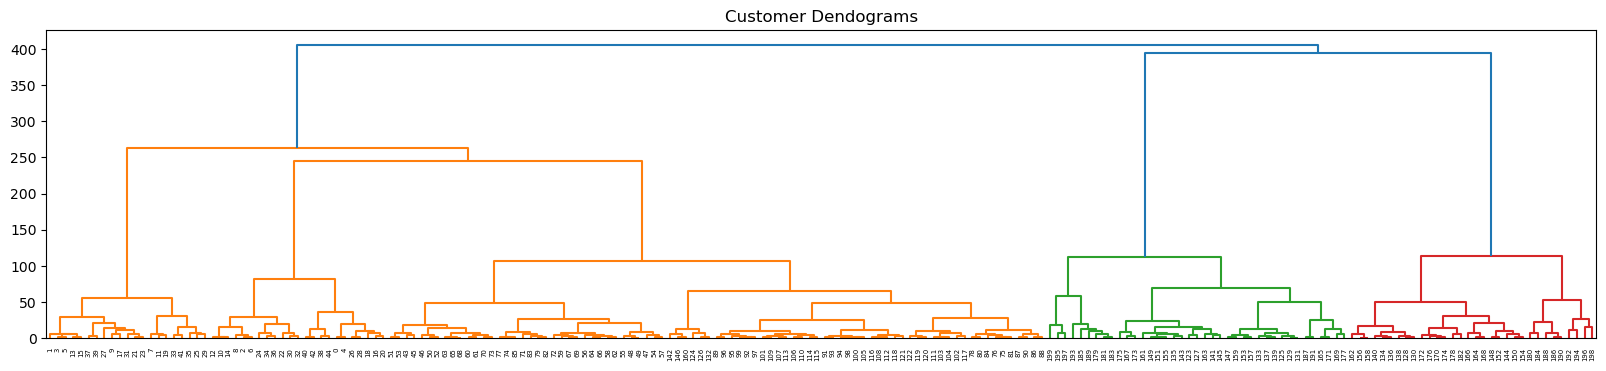

In [5]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 4))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward',metric='euclidean')) #ward = minimum of variance

In [6]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward') # ward = minimum variance

In [7]:
customer_data['Group'] = cluster.fit_predict(data)
customer_data

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


plt.figure(figsize=(12, 4))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

# Optional

<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

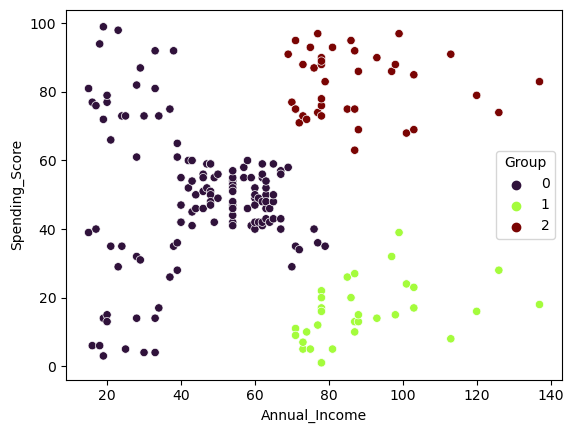

In [8]:
import seaborn as sns 
sns.scatterplot(x='Annual_Income',y='Spending_Score',hue='Group',palette="turbo",data=customer_data)

In [9]:
customer_data.Group = customer_data.Group.replace([0,1,2],['Earning_Less_Spent_High','Earning_High_Spent_Less','Earning_High_Spent_High'])
customer_data

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Group
0,1,Male,19,15,39,Earning_Less_Spent_High
1,2,Male,21,15,81,Earning_Less_Spent_High
2,3,Female,20,16,6,Earning_Less_Spent_High
3,4,Female,23,16,77,Earning_Less_Spent_High
4,5,Female,31,17,40,Earning_Less_Spent_High
...,...,...,...,...,...,...
195,196,Female,35,120,79,Earning_High_Spent_High
196,197,Female,45,126,28,Earning_High_Spent_Less
197,198,Male,32,126,74,Earning_High_Spent_High
198,199,Male,32,137,18,Earning_High_Spent_Less


# Business Submission

In [10]:
Final_Output = customer_data.loc[:,["CustomerID","Group"]]

def condition(x):
    if x== 'Earning_Less_Spent_High':
        return "Offer / EMI "
    elif x== 'Earning_High_Spent_Less':
        return "Offer / No Cost EMI "
    else:
        return 'No Offer'
 
# Applying the conditions
Final_Output['Suggestion'] = Final_Output['Group'].apply(condition)
Final_Output


,CustomerID,Group,Suggestion
0,1,Earning_Less_Spent_High,Offer / EMI
1,2,Earning_Less_Spent_High,Offer / EMI
2,3,Earning_Less_Spent_High,Offer / EMI
3,4,Earning_Less_Spent_High,Offer / EMI
4,5,Earning_Less_Spent_High,Offer / EMI
...,...,...,...
195,196,Earning_High_Spent_High,No Offer
196,197,Earning_High_Spent_Less,Offer / No Cost EMI
197,198,Earning_High_Spent_High,No Offer
198,199,Earning_High_Spent_Less,Offer / No Cost EMI


import os
os.chdir(r"C:\Users\Hp\Desktop\Python Code\Clustering by Irfan\hierarchical clustering")

In [11]:
Final_Output.to_csv("Shopping_data_output.csv",index=False)

# Finished